Menghubungkan dengan Google Drive

In [ ]:
# Menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Colab Notebooks/Praktikum/Praktikum2"

Membaca file CSV

In [ ]:
# Membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv(path + '/Data/500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
# Mencari info data pada file (tipe datanya, non nul count data, nama kolom)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
# Menghitung mean semua kolom numerik
df['Height'].mean()

np.float64(169.944)

In [ ]:
# Menghitung median semua kolom numerik
df['Height'].median()

170.5

In [ ]:
# Mencari modus (hati-hati karena bisa lebih dari satu)
df['Height'].mode()

,Height
0,188


In [ ]:
# Menghitung variansi & standard deviasi
df.var(numeric_only=True)

,0
Height,268.149162
Weight,1048.633267
Index,1.836168


In [ ]:
# Menghitung standard deviasi
df.std(numeric_only=True)

,0
Height,16.375261
Weight,32.382607
Index,1.355053


In [ ]:
# Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ", q1)

# Hitung kuartil ketiga (Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ", q3)

# Hitung IQR (Interquartile Range)
iqr = q3 -q1
print("IQR : ", iqr)

Q1 :  156.0
Q3 :  184.0
IQR :  28.0


In [ ]:
# Untuk membuat statistika deskripsi pada type data int
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
# Menghitung matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)

# Menampilkan matriks korelasi
print("Matriks Korelasi : ")
print(correlation_matrix)

Matriks Korelasi : 
          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


Visualisasi Data

<Axes: >

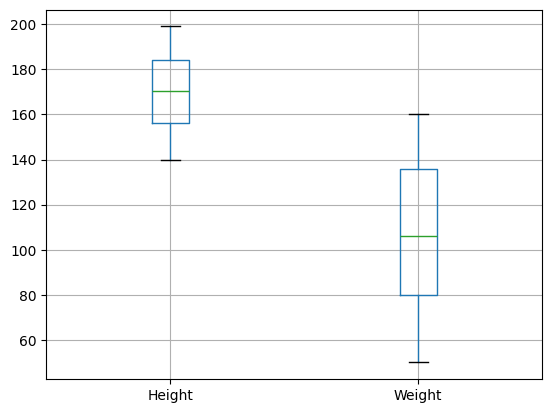

In [ ]:
# Boxplot
import pandas as pd
import numpy as np

df.boxplot(column=['Height', 'Weight'])

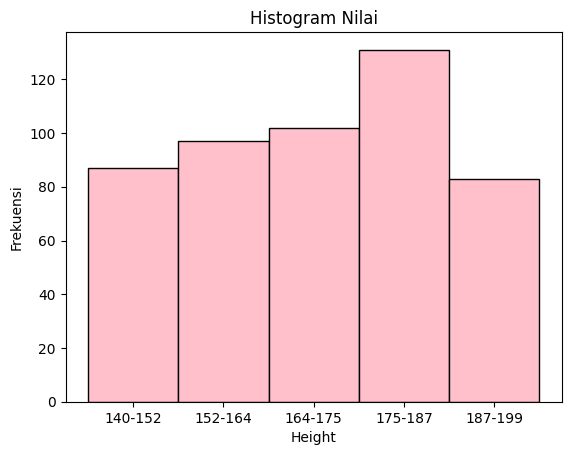

In [ ]:
# Histogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ambil data Height
data_height = df["Height"]

# Buat histogram
n, bins, patches = plt.hist(data_height, bins=5, color='pink', edgecolor='black')

# Tambahkan label
plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

# Tampilkan rentang frekuensi di sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f}'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Tampilkan histogram
plt.show()

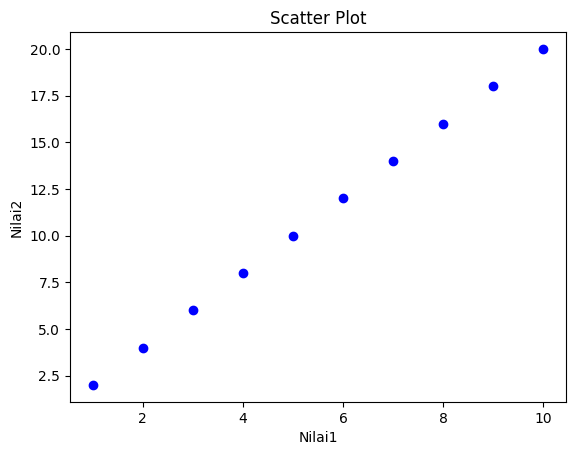

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {
    'Nilai1': [1,2,3,4,5,6,7,8,9,10],
    'Nilai2': [2,4,6,8,10,12,14,16,18,20]
}

df2 = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df2['Nilai1'], df2['Nilai2'], color='blue', marker='o')

#tambahkan label
plt.title('Scatter Plot')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

#tampilkan scatter plot
plt.show()

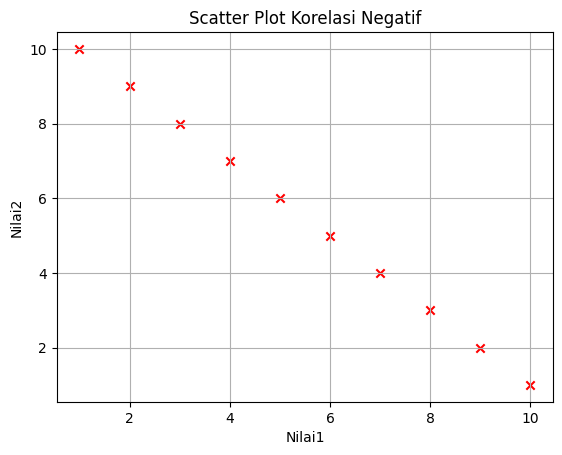

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {
    'Nilai1': [1,2,3,4,5,6,7,8,9,10],
    'Nilai2': [10,9,8,7,6,5,4,3,2,1]
}

df3 = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df3['Nilai1'], df3['Nilai2'], color='red', marker='x')

# tambahkan label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

# Tambahkan grid
plt.grid(True)

# Tampilkan plot
plt.show()

TUGAS PRAKTIKUM MANDIRI

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Baca dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Praktikum/Praktikum2/Data/day.csv')

print("Jumlah total data:", len(df))

# 2. Bagi dataset menjadi Training (80%) dan Testing (20%)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 3. Dari Training, ambil Validation (10% dari training)
train_set, val_set = train_test_split(train_set, test_size=0.1, random_state=42)

# 4. Tampilkan jumlah data masing-masing
print("\nJumlah data Training:", len(train_set))
print("Jumlah data Validation:", len(val_set))
print("Jumlah data Testing:", len(test_set))

# 5. Tampilkan 5 baris pertama masing-masing
print("\n--- Data Training ---")
print(train_set.head())

print("\n--- Data Validation ---")
print(val_set.head())

print("\n--- Data Testing ---")
print(test_set.head())


Jumlah total data: 731

Jumlah data Training: 525
Jumlah data Validation: 59
Jumlah data Testing: 147

--- Data Training ---
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
657      658  2012-10-19       4   1    10        0        5           1   
163      164  2011-06-13       2   0     6        0        1           1   
305      306  2011-11-02       4   0    11        0        3           1   
111      112  2011-04-22       2   0     4        0        5           1   
538      539  2012-06-22       3   1     6        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
657           2  0.563333  0.537896  0.815000   0.134954     753        4671   
163           1  0.635000  0.601654  0.494583   0.305350     863        4157   
305           1  0.377500  0.390133  0.718750   0.082092     370        3816   
111           2  0.336667  0.321954  0.729583   0.219521     177        1506   
538           1  0